# LECTURE 02: Linear regression

## Boilerplate imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## 2D regression

### Define learning rate, convergence definition

In [3]:
alpha = 0.01
maxIteration = 100

### Create m random 2D points

In [4]:
def linear(x, m, b, error):
    currentError = random.uniform(-1 * error, error)
    return m * x + b - currentError


dataset = []
dataAmount = 100
for i in range(0, dataAmount):
    x = random.random() * 10
    y = linear(x, -2, -3, 5)
    dataset.append((x, y))

### Setting up matrices

In [5]:
# Prepare data
X = np.array([[1, x] for x, y in dataset])  # Add bias term (x0=1)
Y = np.array([y for x, y in dataset])
theta = np.zeros(2)  # Initialize parameters [theta0, theta1]

### Batch gradient descent

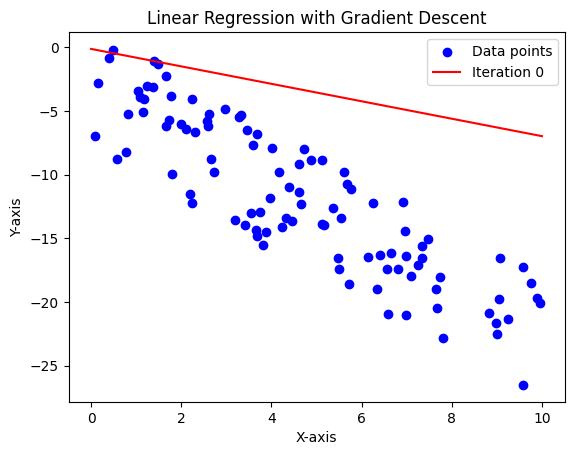

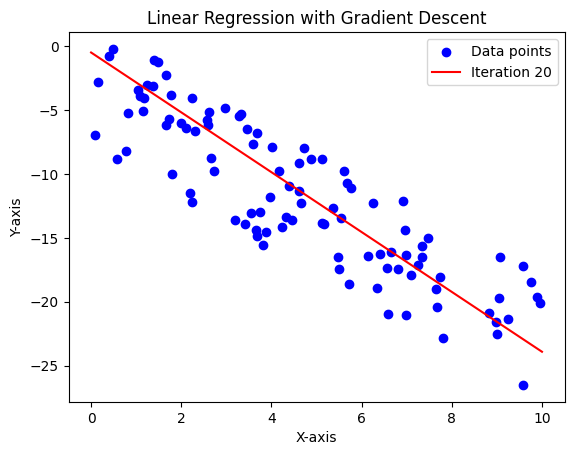

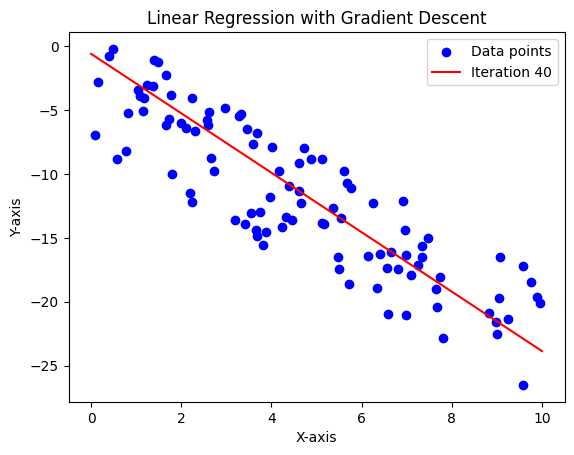

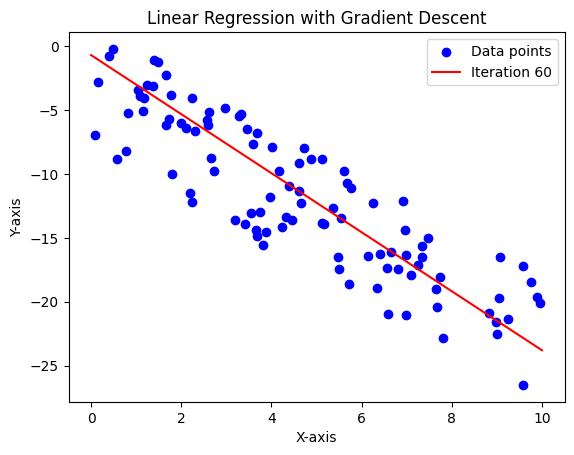

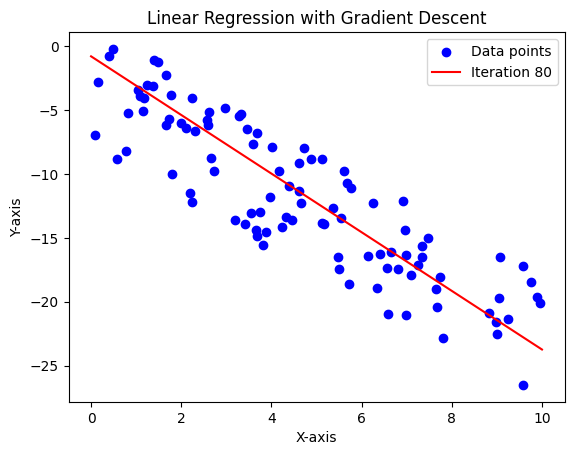

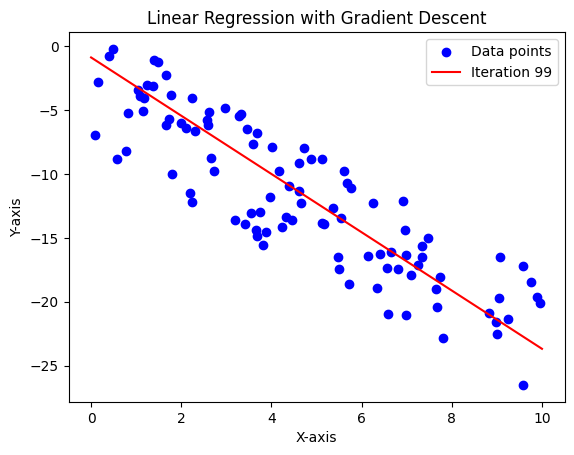

In [6]:
for i in range(maxIteration):
    # Calculate predictions
    predictions = np.dot(X, theta)
    
    # Calculate errors
    errors = predictions - Y
    
    # Calculate gradients
    gradient = np.dot(X.T, errors) / dataAmount
    
    # Update parameters
    theta = theta - alpha * gradient
    
    # Plot progress every 20 iterations
    if i % 20 == 0 or i == maxIteration - 1:
        plt.scatter([x for x, y in dataset], Y, color='blue', marker='o', label='Data points')
        x_vals = np.array([0, 10])
        y_vals = theta[0] + theta[1] * x_vals
        plt.plot(x_vals, y_vals, color='red', label=f'Iteration {i}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Linear Regression with Gradient Descent')
        plt.legend()
        plt.show()
        time.sleep(0.5)  # Pause to see the plot
    

### Stochastic gradient descent

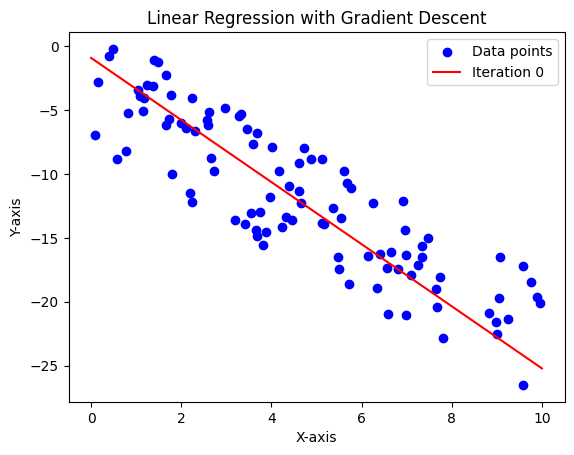

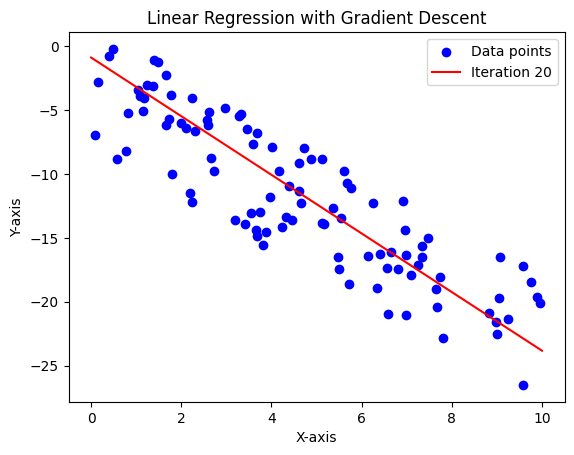

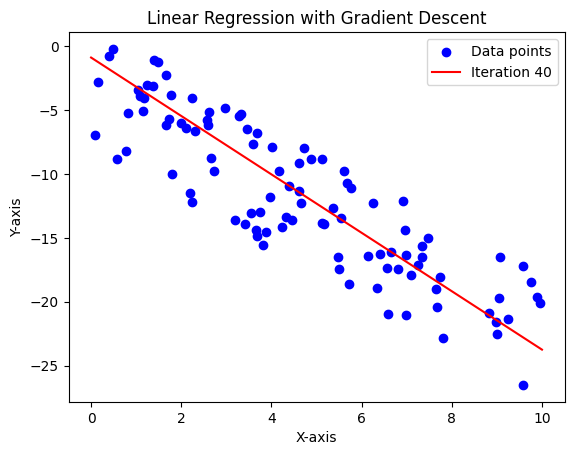

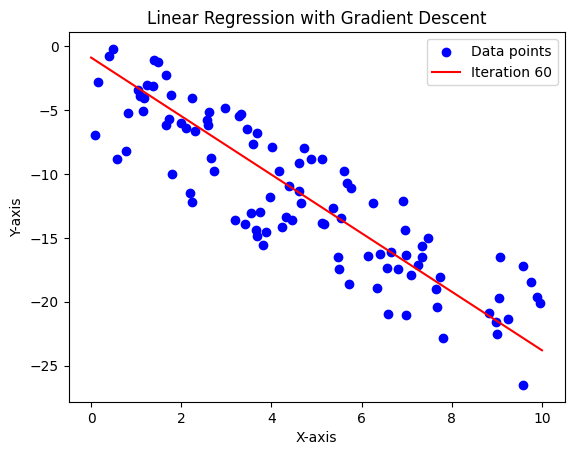

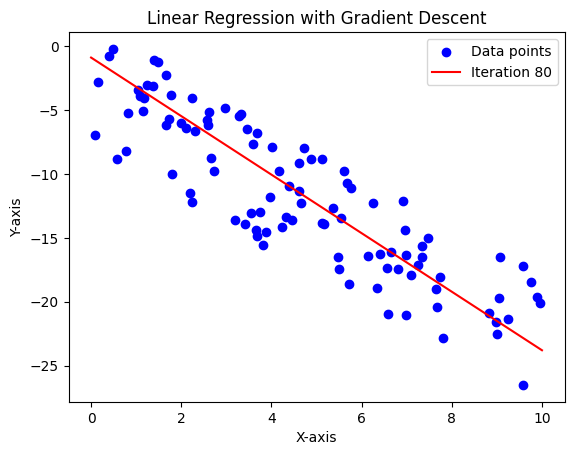

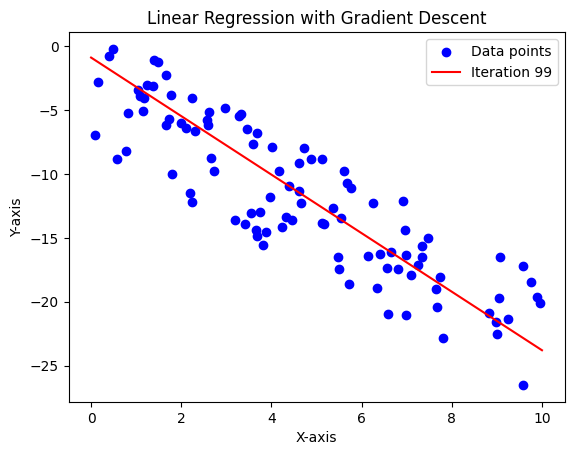

In [7]:
def hypothesis(X, theta):
    return np.dot(X, theta)

alphaStochastic = alpha

for i in range(maxIteration):
    for j in [0, 1]:
        theta[j] = theta[j] - alphaStochastic * (hypothesis(X[i], theta) - Y[i]) * X[i][j]
    alphaStochastic = alphaStochastic * 0.9 # learning rate decay

    # Plot progress every 20 iterationsn
    if i % 20 == 0 or i == maxIteration - 1:
        plt.scatter([x for x, y in dataset], Y, color='blue', marker='o', label='Data points')
        x_vals = np.array([0, 10])
        y_vals = theta[0] + theta[1] * x_vals
        plt.plot(x_vals, y_vals, color='red', label=f'Iteration {i}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Linear Regression with Gradient Descent')
        plt.legend()
        plt.show()
        time.sleep(0.5)  # Pause to see the plot
